<a href="https://colab.research.google.com/github/Codift05/ColabArchive/blob/main/Dataset_PreProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Langkah 1: Import library yang dibutuhkan
# Pandas adalah library utama untuk manipulasi dan analisis data di Python.
# Numpy kita gunakan di sini untuk membuat nilai kosong (np.nan).
import pandas as pd
import numpy as np

# Langkah 2: Membuat data frame (tabel data) tiruan
# Kita akan sengaja membuat beberapa data yang kosong (NaN) untuk latihan.
data = {
    'Nama': ['Andi', 'Budi', 'Citra', 'Dian', 'Eka', 'Fani'],
    'Usia': [20, np.nan, 21, 22, 20, 23],
    'Kota': ['Jakarta', 'Bandung', 'Jakarta', np.nan, 'Surabaya', 'Jakarta'],
    'Nilai': [85, 90, 75, np.nan, 88, 92],
    'Hobi_Tambahan': [np.nan, 'Membaca', np.nan, np.nan, 'Olahraga', np.nan] # Kolom dengan banyak data kosong
}

df = pd.DataFrame(data)

# Langkah 3: Melihat kondisi data awal
print("--- DATA AWAL ---")
print(df)
print("\n") # Memberi spasi agar rapi

# Cek jumlah nilai yang hilang di setiap kolom
print("--- JUMLAH DATA KOSONG (MISSING VALUES) PER KOLOM ---")
print(df.isnull().sum())
print("\n" + "="*50 + "\n")

# ==============================================================================
# STRATEGI A: MENGHAPUS DATA
# Kita akan coba di dataframe terpisah agar tidak merusak data asli
# ==============================================================================

# Opsi 1: Menghapus semua BARIS yang memiliki setidaknya satu nilai kosong
df_hapus_baris = df.dropna()
print("--- HASIL SETELAH MENGHAPUS BARIS ---")
print("Perhatikan, hanya data 'Andi' dan 'Fani' yang tersisa.")
print(df_hapus_baris)
print("\n")

# Opsi 2: Menghapus KOLOM yang memiliki nilai kosong
# Kita hapus kolom 'Hobi_Tambahan' karena >50% datanya kosong
df_hapus_kolom = df.drop('Hobi_Tambahan', axis=1)
print("--- HASIL SETELAH MENGHAPUS KOLOM 'Hobi_Tambahan' ---")
print(df_hapus_kolom)
print("\n" + "="*50 + "\n")

# ==============================================================================
# STRATEGI B: MENGISI DATA (IMPUTATION) -> INI YANG PALING SERING DIGUNAKAN
# Kita akan bekerja pada copy dari dataframe asli
# ==============================================================================

df_imputasi = df.copy() # Buat salinan agar data asli (df) tidak berubah

print("--- PROSES MENGISI DATA KOSONG (IMPUTATION) ---")

# 1. Mengisi kolom 'Usia' (numerik) dengan MEDIAN
median_usia = df_imputasi['Usia'].median()
df_imputasi['Usia'].fillna(median_usia, inplace=True)
print(f"Nilai kosong di 'Usia' diisi dengan Median: {median_usia}")

# 2. Mengisi kolom 'Nilai' (numerik) dengan MEAN (rata-rata)
mean_nilai = df_imputasi['Nilai'].mean()
df_imputasi['Nilai'].fillna(mean_nilai, inplace=True)
print(f"Nilai kosong di 'Nilai' diisi dengan Mean: {mean_nilai:.2f}") # .2f untuk membulatkan 2 angka di belakang koma

# 3. Mengisi kolom 'Kota' (kategorikal) dengan MODUS (nilai paling sering muncul)
modus_kota = df_imputasi['Kota'].mode()[0] # .mode() bisa menghasilkan >1 nilai, kita ambil yg pertama [0]
df_imputasi['Kota'].fillna(modus_kota, inplace=True)
print(f"Nilai kosong di 'Kota' diisi dengan Modus: {modus_kota}")

# 4. Kolom 'Hobi_Tambahan' kita biarkan dulu atau bisa dihapus seperti strategi A
# karena terlalu banyak yang kosong dan sulit diestimasi. Mari kita hapus saja.
df_imputasi = df_imputasi.drop('Hobi_Tambahan', axis=1)
print("Kolom 'Hobi_Tambahan' dihapus karena terlalu banyak data kosong.")
print("\n")

# Langkah Terakhir: Tampilkan hasil akhir setelah dibersihkan dengan imputasi
print("--- DATA AKHIR SETELAH DIBERSIHKAN (IMPUTASI) ---")
print(df_imputasi)
print("\n")

print("--- CEK ULANG DATA KOSONG SETELAH DIBERSIHKAN ---")
print(df_imputasi.isnull().sum())
print("\nSelesai! Tidak ada lagi data kosong di dataframe hasil imputasi.")

--- DATA AWAL ---
    Nama  Usia      Kota  Nilai Hobi_Tambahan
0   Andi  20.0   Jakarta   85.0           NaN
1   Budi   NaN   Bandung   90.0       Membaca
2  Citra  21.0   Jakarta   75.0           NaN
3   Dian  22.0       NaN    NaN           NaN
4    Eka  20.0  Surabaya   88.0      Olahraga
5   Fani  23.0   Jakarta   92.0           NaN


--- JUMLAH DATA KOSONG (MISSING VALUES) PER KOLOM ---
Nama             0
Usia             1
Kota             1
Nilai            1
Hobi_Tambahan    4
dtype: int64


--- HASIL SETELAH MENGHAPUS BARIS ---
Perhatikan, hanya data 'Andi' dan 'Fani' yang tersisa.
  Nama  Usia      Kota  Nilai Hobi_Tambahan
4  Eka  20.0  Surabaya   88.0      Olahraga


--- HASIL SETELAH MENGHAPUS KOLOM 'Hobi_Tambahan' ---
    Nama  Usia      Kota  Nilai
0   Andi  20.0   Jakarta   85.0
1   Budi   NaN   Bandung   90.0
2  Citra  21.0   Jakarta   75.0
3   Dian  22.0       NaN    NaN
4    Eka  20.0  Surabaya   88.0
5   Fani  23.0   Jakarta   92.0


--- PROSES MENGISI DATA KOSONG 

/tmp/ipython-input-2052888058.py:59: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputasi['Usia'].fillna(median_usia, inplace=True)
/tmp/ipython-input-2052888058.py:64: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

--- DATA AWAL ---
         Nama  Gaji  Usia
0  Karyawan A     7    25
1  Karyawan B     8    28
2  Karyawan C     8    24
3  Karyawan D     9    30
4  Karyawan E    10    32
5  Karyawan F    11    29
6     Manager    25    45
7         CEO   100    50


--- DETEKSI OUTLIER MENGGUNAKAN BOX PLOT ---


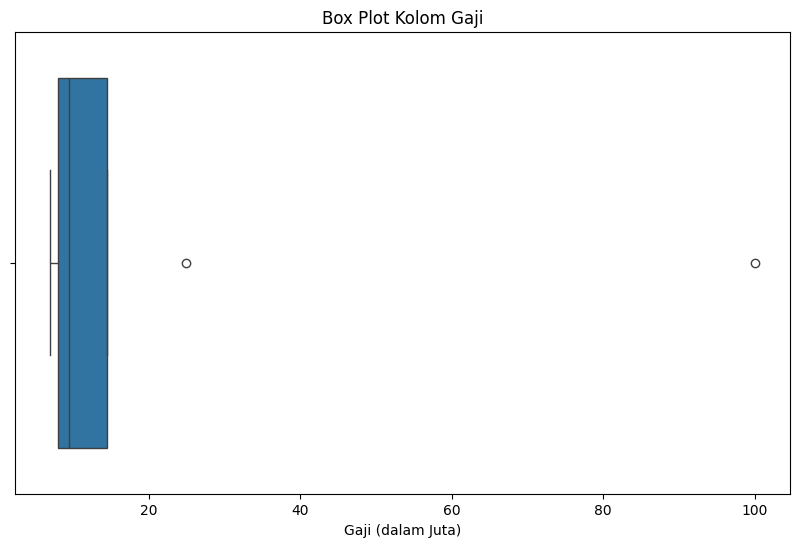

Perhatikan plot di atas. Titik-titik di sebelah kanan (25 dan 100) adalah outlier yang terdeteksi.


--- DETEKSI OUTLIER MENGGUNAKAN METODE IQR ---
Q1: 8.0
Q3: 14.5
IQR: 6.5
Batas Bawah Wajar: -1.75
Batas Atas Wajar: 24.25


Data yang terdeteksi sebagai outlier oleh metode IQR:
      Nama  Gaji  Usia
6  Manager    25    45
7      CEO   100    50


--- OPSI 1: MENGHAPUS OUTLIER ---
Data setelah outlier dihapus:
         Nama  Gaji  Usia
0  Karyawan A     7    25
1  Karyawan B     8    28
2  Karyawan C     8    24
3  Karyawan D     9    30
4  Karyawan E    10    32
5  Karyawan F    11    29




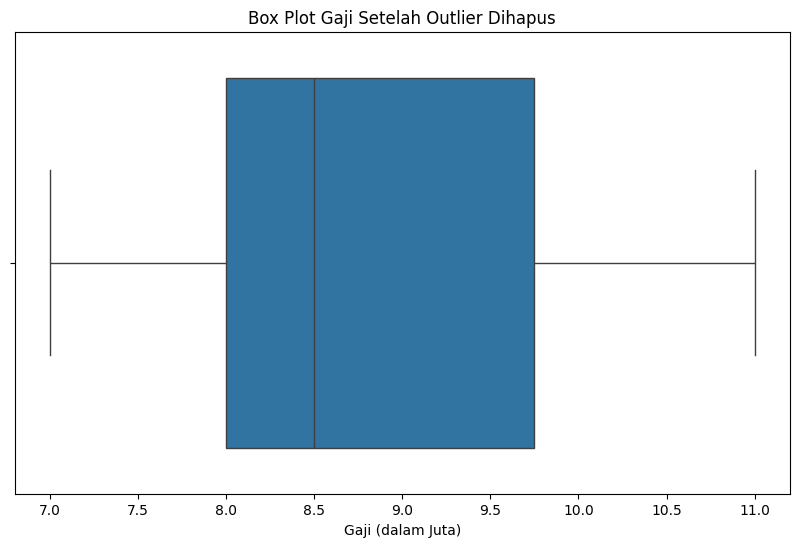



--- OPSI 2: CAPPING OUTLIER ---
Data setelah outlier di-capping (dibatasi):
         Nama   Gaji  Usia
0  Karyawan A   7.00    25
1  Karyawan B   8.00    28
2  Karyawan C   8.00    24
3  Karyawan D   9.00    30
4  Karyawan E  10.00    32
5  Karyawan F  11.00    29
6     Manager  24.25    45
7         CEO  24.25    50




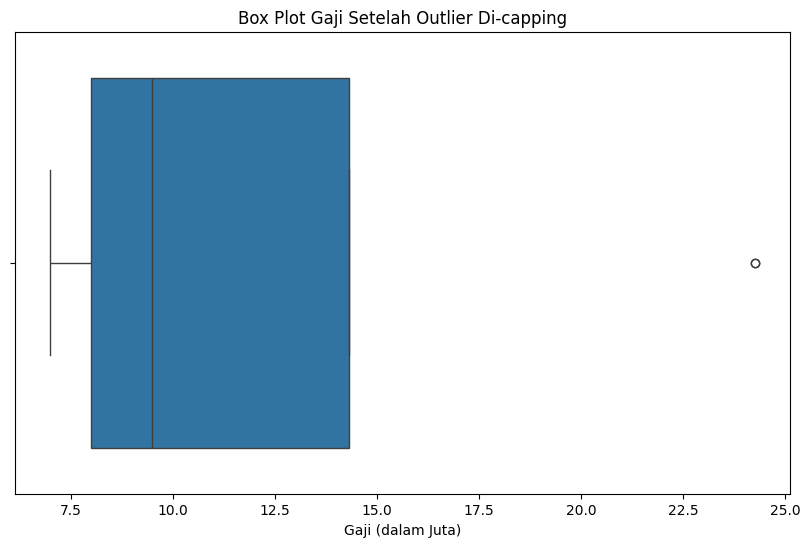

In [2]:
# Langkah 1: Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Langkah 2: Membuat data frame dengan beberapa outlier
# Bayangkan ini data gaji (dalam juta per bulan) di sebuah perusahaan kecil.
# Gaji 100 dan 150 jelas sangat ekstrem dibandingkan yang lain.
data = {
    'Nama': ['Karyawan A', 'Karyawan B', 'Karyawan C', 'Karyawan D', 'Karyawan E', 'Karyawan F', 'Manager', 'CEO'],
    'Gaji': [7, 8, 8, 9, 10, 11, 25, 100],
    'Usia': [25, 28, 24, 30, 32, 29, 45, 50]
}
df = pd.DataFrame(data)

print("--- DATA AWAL ---")
print(df)
print("\n" + "="*50 + "\n")

# ==============================================================================
# DETEKSI OUTLIER
# ==============================================================================

# Cara 1: Deteksi dengan Visualisasi (Box Plot)
# Ini cara paling cepat dan intuitif untuk melihat outlier.
print("--- DETEKSI OUTLIER MENGGUNAKAN BOX PLOT ---")
plt.figure(figsize=(10, 6)) # Mengatur ukuran gambar
sns.boxplot(x=df['Gaji'])
plt.title('Box Plot Kolom Gaji')
plt.xlabel('Gaji (dalam Juta)')
plt.show() # Tampilkan plotnya

print("Perhatikan plot di atas. Titik-titik di sebelah kanan (25 dan 100) adalah outlier yang terdeteksi.")
print("\n" + "="*50 + "\n")


# Cara 2: Deteksi dengan Metode Statistik (Interquartile Range - IQR)
# Ini adalah 'mesin' di balik box plot. Kita hitung batas atas dan batas bawahnya.
print("--- DETEKSI OUTLIER MENGGUNAKAN METODE IQR ---")

# Hitung Q1 (Kuartil pertama), Q3 (Kuartil ketiga), dan IQR
Q1 = df['Gaji'].quantile(0.25)
Q3 = df['Gaji'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas wajar (lower and upper bound)
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Batas Bawah Wajar: {batas_bawah}")
print(f"Batas Atas Wajar: {batas_atas}")
print("\n")

# Cari data mana saja yang berada di luar batas wajar
outliers = df[(df['Gaji'] < batas_bawah) | (df['Gaji'] > batas_atas)]

print("Data yang terdeteksi sebagai outlier oleh metode IQR:")
print(outliers)
print("\n" + "="*50 + "\n")

# ==============================================================================
# PENANGANAN OUTLIER
# ==============================================================================

# Kita akan buat copy dari data awal untuk menunjukkan 2 cara penanganan
df_tanpa_outlier = df.copy()

# Opsi 1: Menghapus Outlier
# Cara ini digunakan jika kita yakin outlier adalah data yang salah (error).
print("--- OPSI 1: MENGHAPUS OUTLIER ---")
df_tanpa_outlier = df_tanpa_outlier[~((df_tanpa_outlier['Gaji'] < batas_bawah) | (df_tanpa_outlier['Gaji'] > batas_atas))]

print("Data setelah outlier dihapus:")
print(df_tanpa_outlier)
print("\n")

# Mari kita lihat box plot setelah outlier dihapus
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_tanpa_outlier['Gaji'])
plt.title('Box Plot Gaji Setelah Outlier Dihapus')
plt.xlabel('Gaji (dalam Juta)')
plt.show()
print("\n" + "="*50 + "\n")


# Opsi 2: Capping (Membatasi Nilai Outlier)
# Mengganti nilai outlier dengan nilai batas atas/bawah.
# Cara ini lebih baik jika outlier adalah data asli yang valid tapi ekstrem,
# karena kita tidak kehilangan data (baris).
print("--- OPSI 2: CAPPING OUTLIER ---")
df_capped = df.copy()

# Ganti nilai yang lebih besar dari batas_atas dengan nilai batas_atas itu sendiri
df_capped['Gaji'] = np.where(
    df_capped['Gaji'] > batas_atas, # Kondisi: jika gaji > batas atas
    batas_atas,                    # Ganti dengan nilai batas_atas
    df_capped['Gaji']              # Jika tidak, biarkan nilainya tetap
)

print("Data setelah outlier di-capping (dibatasi):")
print(df_capped)
print("\n")

# Mari kita lihat box plot setelah di-capping
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_capped['Gaji'])
plt.title('Box Plot Gaji Setelah Outlier Di-capping')
plt.xlabel('Gaji (dalam Juta)')
plt.show()